In [1]:
## Importation les packages
import pandas
import seaborn
import matplotlib.pylab as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from pandas.tools.plotting import scatter_matrix

Using TensorFlow backend.


In [2]:
# Chargement les données 
dataframe = pandas.read_csv("E:/Mini_Projet/covtype.csv")

In [3]:
# Visualistion les données
dataframe.head(3)

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2


In [4]:
# Teste s'il ya des valeurs Null
dataframe[dataframe.isnull().any(axis=1)]

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type


In [5]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
Elevation                             581012 non-null int64
Aspect                                581012 non-null int64
Slope                                 581012 non-null int64
Horizontal_Distance_To_Hydrology      581012 non-null int64
Vertical_Distance_To_Hydrology        581012 non-null int64
Horizontal_Distance_To_Roadways       581012 non-null int64
Hillshade_9am                         581012 non-null int64
Hillshade_Noon                        581012 non-null int64
Hillshade_3pm                         581012 non-null int64
Horizontal_Distance_To_Fire_Points    581012 non-null int64
Wilderness_Area1                      581012 non-null int64
Wilderness_Area2                      581012 non-null int64
Wilderness_Area3                      581012 non-null int64
Wilderness_Area4                      581012 non-null int64
Soil_Type1                            581012 non-

In [6]:
dataframe.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,...,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226,...,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060,2.051471
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210,...,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791,1.396504
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


In [7]:
## Correlation entre les 10 premiers attributs
dataframe.iloc[:,:10].corr()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points
Elevation,1.000000,0.015735,-0.242697,0.306229,0.093306,0.365559,0.112179,0.205887,0.059148,0.148022
Aspect,0.015735,1.000000,0.078728,0.017376,0.070305,0.025121,-0.579273,0.336103,0.646944,-0.109172
Slope,-0.242697,0.078728,1.000000,-0.010607,0.274976,-0.215914,-0.327199,-0.526911,-0.175854,-0.185662
Horizontal_Distance_To_Hydrology,0.306229,0.017376,-0.010607,1.000000,0.606236,0.072030,-0.027088,0.046790,0.052330,0.051874
Vertical_Distance_To_Hydrology,0.093306,0.070305,0.274976,0.606236,1.000000,-0.046372,-0.166333,-0.110957,0.034902,-0.069913
Horizontal_Distance_To_Roadways,0.365559,0.025121,-0.215914,0.072030,-0.046372,1.000000,0.034349,0.189461,0.106119,0.331580
Hillshade_9am,0.112179,-0.579273,-0.327199,-0.027088,-0.166333,0.034349,1.000000,0.010037,-0.780296,0.132669
Hillshade_Noon,0.205887,0.336103,-0.526911,0.046790,-0.110957,0.189461,0.010037,1.000000,0.594274,0.057329
Hillshade_3pm,0.059148,0.646944,-0.175854,0.052330,0.034902,0.106119,-0.780296,0.594274,1.000000,-0.047981
Horizontal_Distance_To_Fire_Points,0.148022,-0.109172,-0.185662,0.051874,-0.069913,0.331580,0.132669,0.057329,-0.047981,1.000000


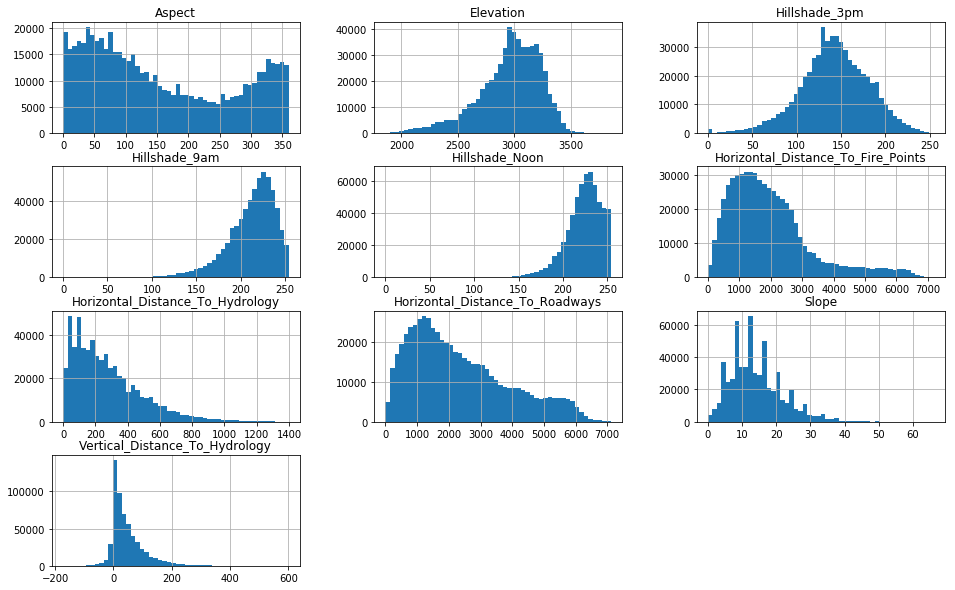

In [8]:
## Visualisation Histogramme de 10 premiers attributs
import matplotlib.pylab as plt
dataframe.iloc[:,:10].hist(figsize=(16,10), bins=50) 
plt.show()

In [9]:
results = dataframe.iloc[:,10:14].apply(pandas.value_counts).fillna(0)
results

,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4
0,320216,551128,327648,544044
1,260796,29884,253364,36968


In [10]:
results1 = dataframe.iloc[:,14:54].apply(pandas.value_counts).fillna(0)
results1

,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
0,577981,573487,576189,568616,579415,574437,580907,580833,579865,548378,...,555346,528493,535858,579401,579121,580893,580714,565439,567206,572262
1,3031,7525,4823,12396,1597,6575,105,179,1147,32634,...,25666,52519,45154,1611,1891,119,298,15573,13806,8750


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


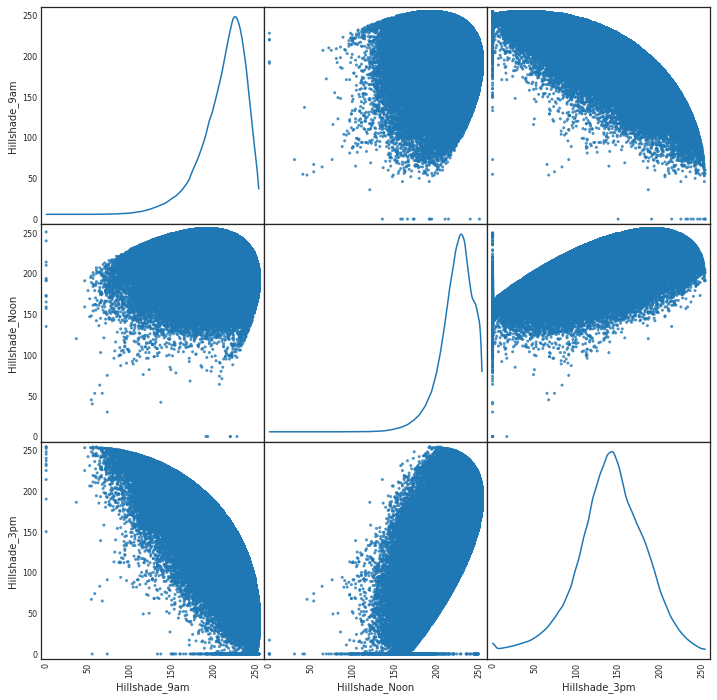

In [11]:
with seaborn.axes_style('white'): 
    smaller_frame = dataframe[['Hillshade_9am', 'Hillshade_Noon','Hillshade_3pm']] 
    scatter_matrix(smaller_frame, alpha=0.8, figsize=(12, 12), diagonal="kde") 
plt.show()

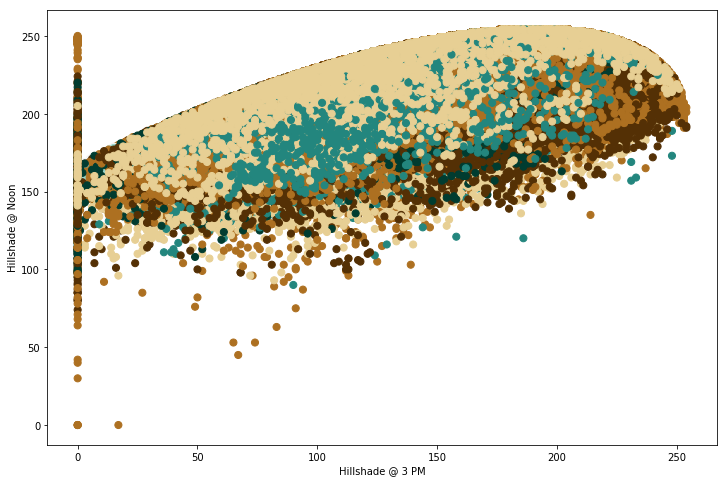

In [12]:
plt.figure(figsize=(12,8)) 
plt.scatter(dataframe.Hillshade_3pm,dataframe.Hillshade_Noon, c=dataframe.Cover_Type, s=50, cmap=plt.cm.BrBG) 
plt.xlabel('Hillshade @ 3 PM')
plt.ylabel('Hillshade @ Noon') 
plt.show()

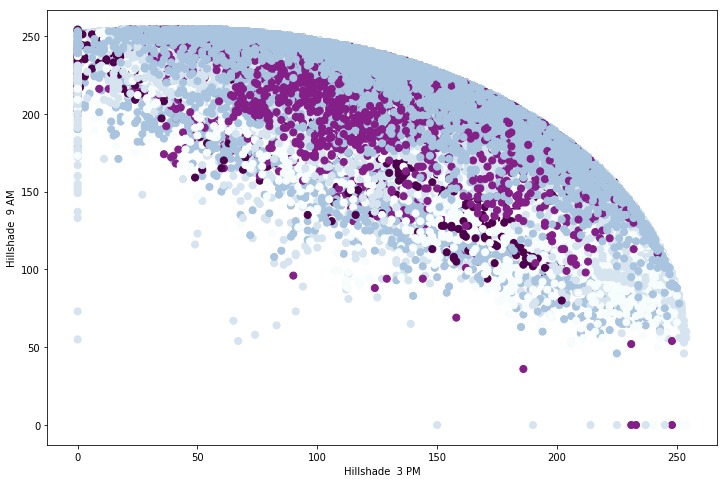

In [13]:
plt.figure(figsize=(12,8)) 
plt.scatter(dataframe.Hillshade_3pm,dataframe.Hillshade_9am, c=dataframe.Cover_Type, s=50, cmap=plt.cm.BuPu) 
plt.xlabel('Hillshade  3 PM') 
plt.ylabel('Hillshade  9 AM') 
plt.show()

In [14]:
## Faire une copy des données pour les traiters
temp=dataframe.copy()
## Mettre la colonne hillshade 3PM dans la dernière colonne
cols=temp.columns.tolist() 
cols=cols[:8]+cols[9:]+[cols[8]] 
temp=temp[cols] 
## Supprimer attribut classe
del temp['Cover_Type']

In [15]:
## Séparrer les données en données  (Contient valeur zéros) et contraire
X_h,y,X_missing,y_missing= temp[temp.Hillshade_3pm!=0].values[:,:-1], \
temp[temp.Hillshade_3pm!=0].values[:,-1:].ravel(), \
temp[temp.Hillshade_3pm==0].values[:,:-1], \
temp[temp.Hillshade_3pm==0].values[:,-1:].ravel()

In [16]:
## Division lés données en données entrainement et teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_h, y, test_size=0.3, random_state=42)

In [17]:
## Application Gradient boost avec nombre itéations 1000
from sklearn.ensemble import GradientBoostingRegressor
gbrt=GradientBoostingRegressor(n_estimators=1000) 
gbrt.fit(X_train,y_train) 

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=1000, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [18]:
## Remplacer les valeurs zéros par les nouveaux valeurs
temp.Hillshade_3pm.loc[temp.Hillshade_3pm==0]=gbrt.predict(X_missing) 
dataframe.Hillshade_3pm=temp.Hillshade_3pm 

In [19]:
import numpy
## Création des nouveaux attrbuts
dataframe['euc_hyd'] = numpy.sqrt(dataframe.Vertical_Distance_To_Hydrology**2 + \
                                dataframe.Horizontal_Distance_To_Hydrology**2) 
dataframe.euc_hyd=dataframe.euc_hyd.map(lambda x: 0 if numpy.isinf(x) else x)

In [20]:
dataframe['euc_hyd_pct'] = dataframe.Vertical_Distance_To_Hydrology/dataframe.Horizontal_Distance_To_Hydrology
dataframe.euc_hyd_pct=dataframe.euc_hyd_pct.map(lambda x: 0 if numpy.isinf(x) or numpy.isnan(x) else x)

In [21]:
dataframe['Mean_Amenities']=(dataframe.Horizontal_Distance_To_Fire_Points + 
                            dataframe.Horizontal_Distance_To_Hydrology + 
                            dataframe.Horizontal_Distance_To_Roadways) / 3

In [22]:
dataframe['Mean_Fire_Hyd']=(dataframe.Horizontal_Distance_To_Fire_Points + 
                            dataframe.Horizontal_Distance_To_Hydrology) / 2

In [23]:
dataframe['Mean_hillshade']=(dataframe.Hillshade_9am + 
                            dataframe.Hillshade_Noon + 
                            dataframe.Hillshade_3pm) / 3

In [24]:
## Réordonner les attributs pour rendre l'attrbut Cover Type das la derniére colonnes
cols=dataframe.columns.tolist()
cols=cols[:10]+cols[-5:]+cols[10:-5]
dataframe=dataframe[cols]

In [25]:
del dataframe['Hillshade_9am']
del dataframe['Hillshade_3pm']
del dataframe['Hillshade_Noon']
del dataframe['Horizontal_Distance_To_Hydrology']
del dataframe['Horizontal_Distance_To_Fire_Points']
del dataframe['Horizontal_Distance_To_Roadways']
del dataframe['Vertical_Distance_To_Hydrology']

In [26]:
del dataframe['Wilderness_Area2']
del dataframe['Wilderness_Area4']

In [27]:
## Séparer l'attribut à éxpliquer au les attributs éxplicatifs
import numpy
dataset = dataframe.values
X = dataset[:, :50].astype(float)
Y = dataset[:,50].ravel()

In [28]:
# Rendre l'attribut (Y = CoverType) des 0 et des 1 (Si le type d'indivudu 2 la case numéro 2 sera contient la valeur 1 et 0 autres) 
dataset = dataframe.values
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_Y)

In [29]:
## Division les données en données entrainements et Test 70% Train et 30% Test
X_train, X_test, y_train, y_test = train_test_split(dataframe.iloc[:,:-1].values, dummy_y, test_size=0.3, random_state=42)

In [30]:
## Standarisation les données c'est a dire centré et normé
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [25]:
## Model 1 avec 50(input)==>Hidden(15)===>Output(7)
# creation model
model = Sequential()
model.add(Dense(50, input_dim=50, activation='relu'))
model.add(Dense(15, activation='relu'))    
model.add(Dense(7, activation='softmax'))
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [28]:
## Lancer model avec 200 itérations et batch size 100
model.fit(X_train, y_train,epochs=200, batch_size=100, verbose=1)

Epoch 1/200
406708/406708 [==============================] - 11s 26us/step - loss: 0.4226 - acc: 0.8269
Epoch 2/200
406708/406708 [==============================] - 10s 25us/step - loss: 0.4069 - acc: 0.8313
Epoch 3/200
406708/406708 [==============================] - 10s 25us/step - loss: 0.3977 - acc: 0.8352
Epoch 4/200
406708/406708 [==============================] - 10s 25us/step - loss: 0.3909 - acc: 0.8385
Epoch 5/200
406708/406708 [==============================] - 10s 25us/step - loss: 0.3856 - acc: 0.8409
Epoch 6/200
406708/406708 [==============================] - 10s 25us/step - loss: 0.3820 - acc: 0.8427
Epoch 7/200
406708/406708 [==============================] - 10s 25us/step - loss: 0.3789 - acc: 0.8446
Epoch 8/200
406708/406708 [==============================] - 10s 25us/step - loss: 0.3759 - acc: 0.8462
Epoch 9/200
406708/406708 [==============================] - 10s 26us/step - loss: 0.3730 - acc: 0.8477
Epoch 10/200
406708/406708 [==============================] - 10

406708/406708 [==============================] - 11s 28us/step - loss: 0.3301 - acc: 0.8702
Epoch 80/200
406708/406708 [==============================] - 11s 28us/step - loss: 0.3301 - acc: 0.8698
Epoch 81/200
406708/406708 [==============================] - 11s 28us/step - loss: 0.3296 - acc: 0.8696
Epoch 82/200
406708/406708 [==============================] - 11s 28us/step - loss: 0.3292 - acc: 0.8701
Epoch 83/200
406708/406708 [==============================] - 11s 28us/step - loss: 0.3292 - acc: 0.8705
Epoch 84/200
406708/406708 [==============================] - 11s 28us/step - loss: 0.3291 - acc: 0.8700
Epoch 85/200
406708/406708 [==============================] - 11s 28us/step - loss: 0.3290 - acc: 0.8704
Epoch 86/200
406708/406708 [==============================] - 11s 28us/step - loss: 0.3287 - acc: 0.8706
Epoch 87/200
406708/406708 [==============================] - 11s 28us/step - loss: 0.3290 - acc: 0.8702
Epoch 88/200
406708/406708 [==============================] - 13s 32

In [29]:
## Visualisation Score
score = model.evaluate(X_test, y_test,verbose=1)
print(score)

174304/174304 [==============================] - 5s 29us/step
[0.31736646687271003, 0.87539012300348817]


In [31]:
## Model 3 utilisant validation croisé avec 50(input)==>Hidden(50)==>Hidden(50)==>Hidden(50)===>Output(7)
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(50, input_dim=50, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(7, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [32]:
estimator = KerasClassifier(build_fn=baseline_model, epochs=200, batch_size=100, verbose=1)

In [33]:
kfold = KFold(n_splits=10, shuffle=True, random_state=7)

In [34]:
results = cross_val_score(estimator, X_train, y_train, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Epoch 1/200
366037/366037 [==============================] - 31s 85us/step - loss: 0.5968 - acc: 0.7460
Epoch 2/200
366037/366037 [==============================] - 12s 33us/step - loss: 0.4840 - acc: 0.7941
Epoch 3/200
366037/366037 [==============================] - 12s 33us/step - loss: 0.4380 - acc: 0.8156
Epoch 4/200
366037/366037 [==============================] - 12s 34us/step - loss: 0.4069 - acc: 0.8290
Epoch 5/200
366037/366037 [==============================] - 12s 34us/step - loss: 0.3845 - acc: 0.8392
Epoch 6/200
366037/366037 [==============================] - 12s 33us/step - loss: 0.3681 - acc: 0.8469
Epoch 7/200
366037/366037 [==============================] - 12s 34us/step - loss: 0.3553 - acc: 0.8524
Epoch 8/200
366037/366037 [==============================] - 12s 34us/step - loss: 0.3440 - acc: 0.8572
Epoch 9/200
366037/366037 [==============================] - 12s 34us/step - loss: 0.3352 - acc: 0.8612
Epoch 10/200
366037/366037 [==============================] - 12

366037/366037 [==============================] - 10s 27us/step - loss: 0.2165 - acc: 0.9136
Epoch 80/200
366037/366037 [==============================] - 10s 27us/step - loss: 0.2172 - acc: 0.9134
Epoch 81/200
366037/366037 [==============================] - 10s 27us/step - loss: 0.2165 - acc: 0.9137
Epoch 82/200
366037/366037 [==============================] - 10s 27us/step - loss: 0.2159 - acc: 0.9138
Epoch 83/200
366037/366037 [==============================] - 10s 27us/step - loss: 0.2165 - acc: 0.9136
Epoch 84/200
366037/366037 [==============================] - 10s 27us/step - loss: 0.2153 - acc: 0.9139
Epoch 85/200
366037/366037 [==============================] - 10s 27us/step - loss: 0.2145 - acc: 0.9143
Epoch 86/200
366037/366037 [==============================] - 10s 27us/step - loss: 0.2152 - acc: 0.9139
Epoch 87/200
366037/366037 [==============================] - 10s 27us/step - loss: 0.2144 - acc: 0.9143
Epoch 88/200
366037/366037 [==============================] - 10s 28

366037/366037 [==============================] - 10s 27us/step - loss: 0.2616 - acc: 0.8952
Epoch 34/200
366037/366037 [==============================] - 10s 27us/step - loss: 0.2597 - acc: 0.8959
Epoch 35/200
366037/366037 [==============================] - 10s 27us/step - loss: 0.2583 - acc: 0.8967
Epoch 36/200
366037/366037 [==============================] - 10s 27us/step - loss: 0.2569 - acc: 0.8974
Epoch 37/200
366037/366037 [==============================] - 10s 27us/step - loss: 0.2556 - acc: 0.8978
Epoch 38/200
366037/366037 [==============================] - 10s 27us/step - loss: 0.2541 - acc: 0.8982
Epoch 39/200
366037/366037 [==============================] - 10s 27us/step - loss: 0.2529 - acc: 0.8988
Epoch 40/200
366037/366037 [==============================] - 10s 27us/step - loss: 0.2501 - acc: 0.8998
Epoch 41/200
366037/366037 [==============================] - 10s 27us/step - loss: 0.2492 - acc: 0.9004
Epoch 42/200
366037/366037 [==============================] - 10s 27

366037/366037 [==============================] - 11s 29us/step - loss: 0.2122 - acc: 0.9157
Epoch 112/200
366037/366037 [==============================] - 11s 30us/step - loss: 0.2126 - acc: 0.9154
Epoch 113/200
366037/366037 [==============================] - 10s 28us/step - loss: 0.2113 - acc: 0.9163
Epoch 114/200
366037/366037 [==============================] - 10s 28us/step - loss: 0.2117 - acc: 0.9160
Epoch 115/200
366037/366037 [==============================] - 10s 29us/step - loss: 0.2108 - acc: 0.9161
Epoch 116/200
366037/366037 [==============================] - 11s 31us/step - loss: 0.2107 - acc: 0.9164
Epoch 117/200
366037/366037 [==============================] - 11s 29us/step - loss: 0.2108 - acc: 0.9159
Epoch 118/200
366037/366037 [==============================] - 10s 28us/step - loss: 0.2094 - acc: 0.9172
Epoch 119/200
366037/366037 [==============================] - 10s 27us/step - loss: 0.2095 - acc: 0.9164
Epoch 120/200
366037/366037 [==============================]

366037/366037 [==============================] - 10s 28us/step - loss: 0.2252 - acc: 0.9094
Epoch 66/200
366037/366037 [==============================] - 10s 28us/step - loss: 0.2242 - acc: 0.9096
Epoch 67/200
366037/366037 [==============================] - 10s 28us/step - loss: 0.2244 - acc: 0.9102
Epoch 68/200
366037/366037 [==============================] - 10s 28us/step - loss: 0.2240 - acc: 0.9107 3s - loss: 0.2231 -  - ETA: 2s - loss: 0
Epoch 69/200
366037/366037 [==============================] - 10s 28us/step - loss: 0.2225 - acc: 0.9102
Epoch 70/200
366037/366037 [==============================] - 13s 36us/step - loss: 0.2225 - acc: 0.9107
Epoch 71/200
366037/366037 [==============================] - 11s 31us/step - loss: 0.2224 - acc: 0.9102
Epoch 72/200
366037/366037 [==============================] - 10s 28us/step - loss: 0.2220 - acc: 0.9110
Epoch 73/200
366037/366037 [==============================] - 10s 28us/step - loss: 0.2215 - acc: 0.9110
Epoch 74/200
366037/366037 

366037/366037 [==============================] - 12s 33us/step - loss: 0.2893 - acc: 0.8813
Epoch 20/200
366037/366037 [==============================] - 12s 33us/step - loss: 0.2862 - acc: 0.8835
Epoch 21/200
366037/366037 [==============================] - 12s 33us/step - loss: 0.2820 - acc: 0.8850
Epoch 22/200
366037/366037 [==============================] - 12s 33us/step - loss: 0.2795 - acc: 0.8860
Epoch 23/200
366037/366037 [==============================] - 12s 33us/step - loss: 0.2769 - acc: 0.8870
Epoch 24/200
366037/366037 [==============================] - 15s 41us/step - loss: 0.2746 - acc: 0.8881
Epoch 25/200
366037/366037 [==============================] - 12s 34us/step - loss: 0.2721 - acc: 0.8891
Epoch 26/200
366037/366037 [==============================] - 12s 34us/step - loss: 0.2699 - acc: 0.8899
Epoch 27/200
366037/366037 [==============================] - 15s 40us/step - loss: 0.2677 - acc: 0.8909
Epoch 28/200
366037/366037 [==============================] - 13s 35

366037/366037 [==============================] - 11s 31us/step - loss: 0.2001 - acc: 0.9207
Epoch 174/200
366037/366037 [==============================] - 11s 29us/step - loss: 0.1997 - acc: 0.9208
Epoch 175/200
366037/366037 [==============================] - 12s 33us/step - loss: 0.1998 - acc: 0.9208
Epoch 176/200
366037/366037 [==============================] - 11s 30us/step - loss: 0.1998 - acc: 0.9200
Epoch 177/200
366037/366037 [==============================] - 11s 29us/step - loss: 0.2018 - acc: 0.9200
Epoch 178/200
366037/366037 [==============================] - 10s 28us/step - loss: 0.1989 - acc: 0.9204
Epoch 179/200
366037/366037 [==============================] - 10s 29us/step - loss: 0.2001 - acc: 0.9202
Epoch 180/200
366037/366037 [==============================] - 10s 29us/step - loss: 0.1995 - acc: 0.9202
Epoch 181/200
366037/366037 [==============================] - 11s 29us/step - loss: 0.1993 - acc: 0.9207
Epoch 182/200
366037/366037 [==============================]

366037/366037 [==============================] - 11s 29us/step - loss: 0.2091 - acc: 0.9171
Epoch 128/200
366037/366037 [==============================] - 10s 28us/step - loss: 0.2094 - acc: 0.9170
Epoch 129/200
366037/366037 [==============================] - 10s 28us/step - loss: 0.2099 - acc: 0.9170
Epoch 130/200
366037/366037 [==============================] - 10s 28us/step - loss: 0.2098 - acc: 0.9168
Epoch 131/200
366037/366037 [==============================] - 10s 28us/step - loss: 0.2080 - acc: 0.9180
Epoch 132/200
366037/366037 [==============================] - 10s 28us/step - loss: 0.2086 - acc: 0.9173
Epoch 133/200
366037/366037 [==============================] - 10s 28us/step - loss: 0.2087 - acc: 0.9174
Epoch 134/200
366037/366037 [==============================] - 11s 29us/step - loss: 0.2085 - acc: 0.9175
Epoch 135/200
366037/366037 [==============================] - 10s 28us/step - loss: 0.2096 - acc: 0.9175
Epoch 136/200
366037/366037 [==============================]

366037/366037 [==============================] - 10s 28us/step - loss: 0.2229 - acc: 0.9118
Epoch 82/200
366037/366037 [==============================] - 11s 29us/step - loss: 0.2213 - acc: 0.9116
Epoch 83/200
366037/366037 [==============================] - 10s 28us/step - loss: 0.2200 - acc: 0.9120
Epoch 84/200
366037/366037 [==============================] - 11s 31us/step - loss: 0.2204 - acc: 0.9117
Epoch 85/200
366037/366037 [==============================] - 13s 37us/step - loss: 0.2191 - acc: 0.9124
Epoch 86/200
366037/366037 [==============================] - 13s 36us/step - loss: 0.2186 - acc: 0.9123
Epoch 87/200
366037/366037 [==============================] - 16s 44us/step - loss: 0.2184 - acc: 0.9126
Epoch 88/200
366037/366037 [==============================] - 14s 37us/step - loss: 0.2179 - acc: 0.9129
Epoch 89/200
366037/366037 [==============================] - 13s 36us/step - loss: 0.2172 - acc: 0.9131
Epoch 90/200
366037/366037 [==============================] - 16s 43

Epoch 158/200
366037/366037 [==============================] - 15s 41us/step - loss: 0.2008 - acc: 0.9202
Epoch 159/200
366037/366037 [==============================] - 12s 34us/step - loss: 0.2006 - acc: 0.9198
Epoch 160/200
366037/366037 [==============================] - 11s 29us/step - loss: 0.2004 - acc: 0.9204
Epoch 161/200
366037/366037 [==============================] - 11s 29us/step - loss: 0.1999 - acc: 0.9199
Epoch 162/200
366037/366037 [==============================] - 11s 30us/step - loss: 0.1997 - acc: 0.9206
Epoch 163/200
366037/366037 [==============================] - 12s 32us/step - loss: 0.2004 - acc: 0.9204
Epoch 164/200
366037/366037 [==============================] - 11s 31us/step - loss: 0.2001 - acc: 0.9207
Epoch 165/200
366037/366037 [==============================] - 12s 31us/step - loss: 0.1999 - acc: 0.9205
Epoch 166/200
366037/366037 [==============================] - 11s 31us/step - loss: 0.1992 - acc: 0.9209
Epoch 167/200
366037/366037 [=================

366037/366037 [==============================] - 12s 34us/step - loss: 0.2069 - acc: 0.9171
Epoch 113/200
366037/366037 [==============================] - 12s 34us/step - loss: 0.2063 - acc: 0.9176
Epoch 114/200
366037/366037 [==============================] - 12s 33us/step - loss: 0.2061 - acc: 0.9174
Epoch 115/200
366037/366037 [==============================] - 12s 33us/step - loss: 0.2066 - acc: 0.9174
Epoch 116/200
366037/366037 [==============================] - 12s 33us/step - loss: 0.2060 - acc: 0.9170
Epoch 117/200
366037/366037 [==============================] - 12s 34us/step - loss: 0.2054 - acc: 0.9177
Epoch 118/200
366037/366037 [==============================] - 11s 31us/step - loss: 0.2047 - acc: 0.9179
Epoch 119/200
366037/366037 [==============================] - 11s 30us/step - loss: 0.2050 - acc: 0.9180
Epoch 120/200
366037/366037 [==============================] - 11s 29us/step - loss: 0.2054 - acc: 0.9179
Epoch 121/200
366037/366037 [==============================]

366037/366037 [==============================] - 12s 32us/step - loss: 0.2288 - acc: 0.9094
Epoch 67/200
366037/366037 [==============================] - 11s 31us/step - loss: 0.2274 - acc: 0.9096
Epoch 68/200
366037/366037 [==============================] - 12s 34us/step - loss: 0.2271 - acc: 0.9094
Epoch 69/200
366037/366037 [==============================] - 11s 31us/step - loss: 0.2260 - acc: 0.9103
Epoch 70/200
366037/366037 [==============================] - 11s 30us/step - loss: 0.2259 - acc: 0.9105
Epoch 71/200
366037/366037 [==============================] - 11s 30us/step - loss: 0.2258 - acc: 0.9103
Epoch 72/200
366037/366037 [==============================] - 11s 29us/step - loss: 0.2254 - acc: 0.9102
Epoch 73/200
366037/366037 [==============================] - 11s 29us/step - loss: 0.2241 - acc: 0.9110
Epoch 74/200
366037/366037 [==============================] - 11s 30us/step - loss: 0.2241 - acc: 0.9110
Epoch 75/200
366037/366037 [==============================] - 11s 30

366038/366038 [==============================] - 12s 34us/step - loss: 0.2846 - acc: 0.8847
Epoch 20/200
366038/366038 [==============================] - 14s 37us/step - loss: 0.2800 - acc: 0.8866
Epoch 21/200
366038/366038 [==============================] - 13s 37us/step - loss: 0.2776 - acc: 0.8876
Epoch 22/200
366038/366038 [==============================] - 16s 44us/step - loss: 0.2760 - acc: 0.8884
Epoch 23/200
366038/366038 [==============================] - 13s 37us/step - loss: 0.2725 - acc: 0.8898
Epoch 24/200
366038/366038 [==============================] - 13s 36us/step - loss: 0.2704 - acc: 0.8906 0s - loss: 0.2704 - acc: 0.8
Epoch 25/200
366038/366038 [==============================] - 16s 45us/step - loss: 0.2679 - acc: 0.8915
Epoch 26/200
366038/366038 [==============================] - 13s 36us/step - loss: 0.2656 - acc: 0.8924
Epoch 27/200
366038/366038 [==============================] - 16s 44us/step - loss: 0.2635 - acc: 0.8933
Epoch 28/200
366038/366038 [===========

Epoch 173/200
366038/366038 [==============================] - 13s 36us/step - loss: 0.2002 - acc: 0.9207
Epoch 174/200
366038/366038 [==============================] - 12s 34us/step - loss: 0.2006 - acc: 0.9206
Epoch 175/200
366038/366038 [==============================] - 12s 34us/step - loss: 0.2009 - acc: 0.9208
Epoch 176/200
366038/366038 [==============================] - 12s 34us/step - loss: 0.2003 - acc: 0.9212
Epoch 177/200
366038/366038 [==============================] - 12s 34us/step - loss: 0.2003 - acc: 0.9212
Epoch 178/200
366038/366038 [==============================] - 12s 34us/step - loss: 0.2000 - acc: 0.9212
Epoch 179/200
366038/366038 [==============================] - 12s 34us/step - loss: 0.2009 - acc: 0.9204
Epoch 180/200
366038/366038 [==============================] - 12s 34us/step - loss: 0.1995 - acc: 0.9214
Epoch 181/200
366038/366038 [==============================] - 12s 34us/step - loss: 0.1995 - acc: 0.9216
Epoch 182/200
366038/366038 [=================

366038/366038 [==============================] - 13s 37us/step - loss: 0.2052 - acc: 0.9181
Epoch 128/200
366038/366038 [==============================] - 13s 37us/step - loss: 0.2033 - acc: 0.9193
Epoch 129/200
366038/366038 [==============================] - 13s 37us/step - loss: 0.2038 - acc: 0.9185
Epoch 130/200
366038/366038 [==============================] - 15s 42us/step - loss: 0.2040 - acc: 0.9185
Epoch 131/200
366038/366038 [==============================] - 15s 40us/step - loss: 0.2032 - acc: 0.9190
Epoch 132/200
366038/366038 [==============================] - 14s 37us/step - loss: 0.2032 - acc: 0.9185
Epoch 133/200
366038/366038 [==============================] - 14s 39us/step - loss: 0.2030 - acc: 0.9188
Epoch 134/200
366038/366038 [==============================] - 16s 43us/step - loss: 0.2028 - acc: 0.9189
Epoch 135/200
366038/366038 [==============================] - 14s 37us/step - loss: 0.2026 - acc: 0.9191
Epoch 136/200
366038/366038 [==============================]

In [36]:
print("Error  %.2f%%" % (100-results[1]*100))

Error  8.51%
